Настройка засечек: https://pyprog.pro/mpl/mpl_axis_ticks.html

Docs Matplotlib: https://matplotlib.org/3.5.0/api/axis_api.html?highlight=matplotlib%20axis%20xaxis#matplotlib.axis.XAxis

In [16]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
from io import StringIO   # StringIO behaves like a file object
import numpy as np
import pandas as pd

### 1. Задание Лайт Matplotlib

In [18]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib
import matplotlib.pyplot as plt

#### 1.1. Напишите программу Python для построения графиков финансовых данных Alphabet Inc. в период с 3 октября 2016 г. по 7 октября 2016 г.

In [20]:
fileSimulation = StringIO\
( \
"Data,Open,High,Low,Close \n\
10-03-16, 774.25,     776.065002, 769.5,      772.559998 \n\
10-04-16, 776.030029, 778.710022, 772.890015, 776.429993 \n\
10-05-16, 779.309998, 782.070007, 775.650024, 776.469971 \n\
10-06-16, 779,        780.47998,  775.539978, 776.859985 \n\
10-07-16, 779.659973, 779.659973, 770.75,     775.080017"
)

dataT1 = pd.read_csv(filepath_or_buffer=fileSimulation, sep=',', index_col=0)
dataT1

,Open,High,Low,Close
Data,,,,
10-03-16,774.250000,776.065002,769.500000,772.559998
10-04-16,776.030029,778.710022,772.890015,776.429993
10-05-16,779.309998,782.070007,775.650024,776.469971
10-06-16,779.000000,780.479980,775.539978,776.859985
10-07-16,779.659973,779.659973,770.750000,775.080017


In [21]:
#convert index string to data type
dataT1.index = pd.to_datetime(dataT1.index.values)
dataT1

,Open,High,Low,Close
2016-10-03,774.250000,776.065002,769.500000,772.559998
2016-10-04,776.030029,778.710022,772.890015,776.429993
2016-10-05,779.309998,782.070007,775.650024,776.469971
2016-10-06,779.000000,780.479980,775.539978,776.859985
2016-10-07,779.659973,779.659973,770.750000,775.080017


<AxesSubplot:>

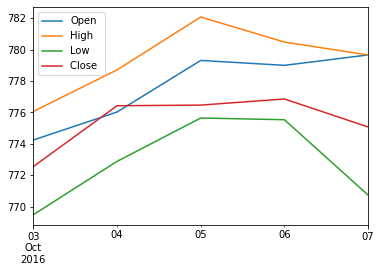

In [22]:
dataT1.plot()

#### 1.2. Напишите программу Python для отображения сетки и построения линейных диаграмм конечной стоимости Alphabet Inc. в период с 3 октября 2016 года по 7 октября 2016 года. Настроены линии сетки со стилем линий -, шириной 0,5. и цвет синий.

In [23]:
fileSimulation = StringIO\
(
"Date, Closing Value\n\
03-10-16,772.559998\n\
04-10-16,776.429993\n\
05-10-16,776.469971\n\
06-10-16,776.859985\n\
07-10-16,775.080017"
)

dataT2 = pd.read_csv(filepath_or_buffer=fileSimulation, sep=',', index_col=0)
dataT2

,Closing Value
Date,
03-10-16,772.559998
04-10-16,776.429993
05-10-16,776.469971
06-10-16,776.859985
07-10-16,775.080017


In [24]:
#convert index string to data type
dataT2.index = pd.to_datetime(dataT2.index)
dataT2

,Closing Value
Date,
2016-03-10,772.559998
2016-04-10,776.429993
2016-05-10,776.469971
2016-06-10,776.859985
2016-07-10,775.080017


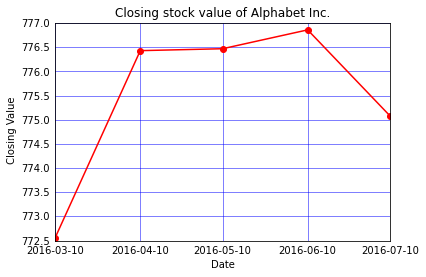

In [25]:
yPlotTicks = np.linspace(772.5, 777, 10)

fg, ax = plt.subplots()

ax.plot(dataT2, 
        marker='o',
        color='red')

ax.grid(True)
ax.set(xlabel=dataT2.axes[0].name,
        ylabel=dataT2.axes[1][0],
        title="Closing stock value of Alphabet Inc.")
ax.set_yticks(yPlotTicks)
ax.set_xticks(dataT2.index.values)
ax.set_xlim(dataT2.index[0], dataT2.index[-1])
ax.set_ylim(yPlotTicks[0], yPlotTicks[-1])
ax.grid(color='blue', linestyle='-', linewidth=0.5)

ax.tick_params(axis = 'both', 
               which = 'major',
               direction = 'inout',
               bottom = False,
               top = False,
               left = False,
               right = False
)

#### 1.3. Напишите программу Python для отображения гистограммы популярности языков программирования.

In [26]:
fileSimulation = StringIO\
(
"Languages: Java, Python, PHP, JavaScript, C#, C++\n\
Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7"
)

dataT3 = pd.read_table(filepath_or_buffer=fileSimulation, sep="\s*[,:]\s*", index_col=0).T
dataT3

C:\Users\leysh\AppData\Local\Temp\ipykernel_21716\4187709662.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataT3 = pd.read_table(filepath_or_buffer=fileSimulation, sep="\s*[,:]\s*", index_col=0).T


Languages,Popularity
Java,22.2
Python,17.6
PHP,8.8
JavaScript,8.0
C#,7.7
C++,6.7


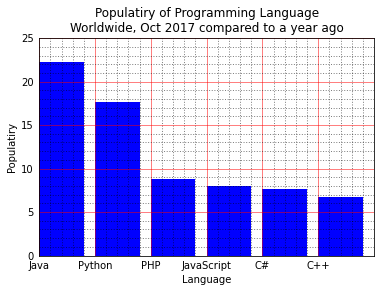

In [27]:
yPlotTicks = np.linspace(0, 25, 6)

fig, ax = plt.subplots()
dataT3.plot(kind='bar', 
        ax=ax, 
        rot=0, 
        color='b',
        align='edge',
        width=0.8,
        legend=False
        )

ax.set(title="Populatiry of Programming Language\nWorldwide, Oct 2017 compared to a year ago",
        xlabel="Language",
        ylabel="Populatiry")

ax.set_xlim(0, 6)
ax.set_yticks(yPlotTicks)

ax.grid(which='major', color='r', linewidth=0.5)
ax.grid(which='minor', color='black', linestyle=':', linewidth=1, alpha=0.5)
ax.minorticks_on()

ax.tick_params(axis = 'both', 
               which = 'major',
               direction = 'inout',
               bottom = False,
               top = False,
               left = False,
               right = False
)
ax.tick_params(axis = 'both', 
               which = 'minor',
               direction = 'inout',
               bottom = False,
               top = False,
               left = False,
               right = False
)

##### 1.3.1 Используя те же самые данные и тип диграммы: Раскрасьте столбцы разными цветами, сделайте их горизонтальными.

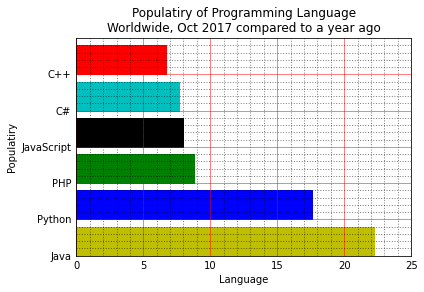

In [28]:
nSize = dataT3.index.size
yPlotTicks = np.linspace(0, 25, nSize)

fig, ax = plt.subplots()
dataT3.plot(kind='barh', 
        ax=ax, 
        rot=0, 
        align='edge',
        width=0.8,
        legend=False
        )

ax.set(title="Populatiry of Programming Language\nWorldwide, Oct 2017 compared to a year ago",
        xlabel="Language",
        ylabel="Populatiry")

ax.set_ylim(0, 6)
ax.set_xticks(yPlotTicks)

ax.grid(which='major', color='r', linewidth=0.5)
ax.grid(which='minor', color='black', linestyle=':', linewidth=1, alpha=0.5)
ax.minorticks_on()

childs = ax.get_children()
colors = np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
np.random.shuffle(colors)

for i in range(nSize):
        childs[i].set_color(colors[i])

ax.tick_params(axis = 'both', 
               which = 'major',
               direction = 'inout',
               bottom = False,
               top = False,
               left = False,
               right = False
)
ax.tick_params(axis = 'both', 
               which = 'minor',
               direction = 'inout',
               bottom = False,
               top = False,
               left = False,
               right = False
)

#### 1.4. Напишите программу на Python, чтобы создать график столбиков стека и добавить меткук каждому разделу

In [29]:
people = ('G1','G2','G3','G4','G5','G6','G7','G8')
segments = 4
# multi-dimensional data
data = [[ 3.40022085, 7.70632498, 6.4097905, 
10.51648577, 7.5330039, 7.1123587, 12.77792868, 
3.44773477],
[ 11.24811149, 5.03778215, 6.65808464, 12.32220677, 
7.45964195, 6.79685302, 7.24578743, 3.69371847],
[ 3.94253354, 4.74763549, 11.73529246, 4.6465543, 
12.9952182, 4.63832778, 11.16849999, 8.56883433],
[ 4.24409799, 12.71746612, 11.3772169, 9.00514257, 
10.47084185, 10.97567589, 3.98287652, 8.80552122]]

dataT4 = pd.DataFrame(np.transpose(data), people, ["R", "G", "W", "P"])
dataT4

,R,G,W,P
G1,3.400221,11.248111,3.942534,4.244098
G2,7.706325,5.037782,4.747635,12.717466
G3,6.409790,6.658085,11.735292,11.377217
G4,10.516486,12.322207,4.646554,9.005143
G5,7.533004,7.459642,12.995218,10.470842
G6,7.112359,6.796853,4.638328,10.975676
G7,12.777929,7.245787,11.168500,3.982877
G8,3.447735,3.693718,8.568834,8.805521


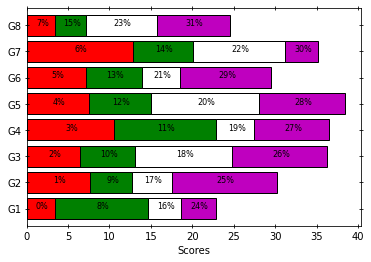

In [30]:
nSize, dWidth= dataT4.index.size, 0.8

fig, ax = plt.subplots()
dataT4.plot(kind='barh', 
        ax=ax, 
        rot=0, 
        align='center',
        width=dWidth,
        stacked=True,
        legend=False,
        color='rgwm',
        edgecolor='k'
        )

ax.set(xlabel="Scores")

sgnWidth = 0.3 # experemental
i=0
childs = ax.get_children()
for c in childs:
        if type(c) == matplotlib.patches.Rectangle:
                s = str(i)+'%'
                rctW, rctH = c.get_width(), c.get_height()
                rctX, rctY = c.xy
                textPos = (rctX + rctW / 2 - len(s) * sgnWidth, rctY + rctH / 2)
                ax.annotate(s, xy=(0, 0), xytext=textPos, size=8)
                i+=1
        else: # first rects is data other is support
                break

ax.tick_params(axis = 'both', 
               which = 'major',
               direction = 'inout',
               bottom = True,
               top = True,
               left = True,
               right = True
)

#### 5. Напишите программу на Python, чтобы нарисовать scatter диаграмму рассеяния для сравнения двух предметных оценок по математике и естествознанию. Используйте оценки 10 учеников. 

In [31]:
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34] 
science_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30] 
marks_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

dataT5 = pd.DataFrame(np.array((math_marks, science_marks, marks_range)).T, index=np.arange(0, 10, 1), columns=["Math", "Science", "Range"])
dataT5

,Math,Science,Range
0,88,35,10
1,92,79,20
2,80,79,30
3,89,48,40
4,100,100,50
5,80,88,60
6,60,32,70
7,100,45,80
8,80,20,90
9,34,30,100


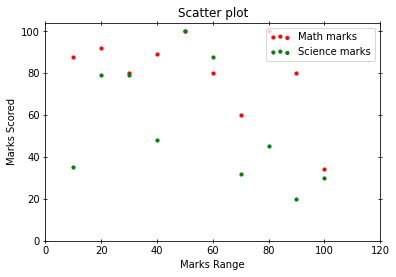

In [32]:
dLinewidths = 10

fig, ax = plt.subplots()
ax.scatter(x=dataT5.Range, y=dataT5.Math, color='r', s=dLinewidths)
ax.scatter(x=dataT5.Range, y=dataT5.Science, color='g', s=dLinewidths)
ax.legend(dataT5.columns + " marks", loc=1, scatterpoints=3)
ax.set(title="Scatter plot",
        xlabel="Marks Range",
        ylabel="Marks Scored")

childs = ax.get_children()
axisObj = ax.get_children()[6]

ax.set_yticks(np.linspace(0,100, 6))
ax.set_xticks(np.linspace(0,120, 7))
ax.tick_params(axis = 'both', 
               which = 'major',
               direction = 'inout',
               bottom = True,
               top = True,
               left = True,
               right = True,
)

### 2. Задание Лайт Seaborn 

In [33]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [34]:
import seaborn as sns

#### 2.1. Напишите программу Python для построения графиков финансовых данных Alphabet Inc. в период с 3 октября 2016 г. по 7 октября 2016 г.

In [35]:
dataT1

,Open,High,Low,Close
2016-10-03,774.250000,776.065002,769.500000,772.559998
2016-10-04,776.030029,778.710022,772.890015,776.429993
2016-10-05,779.309998,782.070007,775.650024,776.469971
2016-10-06,779.000000,780.479980,775.539978,776.859985
2016-10-07,779.659973,779.659973,770.750000,775.080017


In [36]:
dataT1.index.name = "Data"

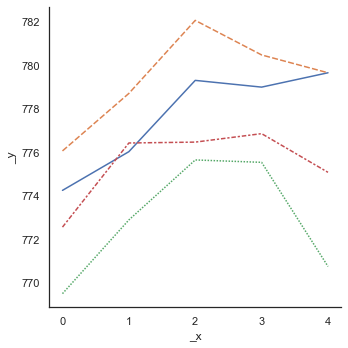

In [37]:
sns.set(style='white')

sns.relplot(kind="line", data=dataT1.values, legend=False)

#### 2.2. Напишите программу Python для отображения сетки и построения линейных диаграмм конечной стоимости Alphabet Inc. в период с 3 октября 2016 года по 7 октября 2016 года. Настроены линии сетки со стилем линий -, шириной 0,5. и цвет синий.

In [38]:
dataT2

,Closing Value
Date,
2016-03-10,772.559998
2016-04-10,776.429993
2016-05-10,776.469971
2016-06-10,776.859985
2016-07-10,775.080017


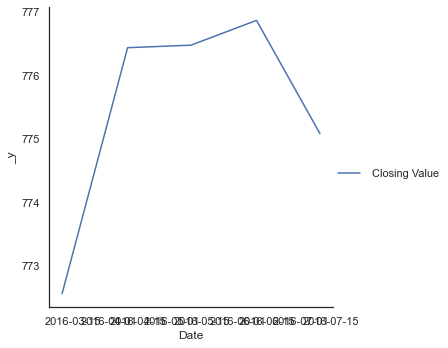

In [39]:
g = sns.relplot(kind="line", data=dataT2)

#### 2.3. Напишите программу Python для отображения гистограммы популярности языков программирования.

In [40]:
dataT3

Languages,Popularity
Java,22.2
Python,17.6
PHP,8.8
JavaScript,8.0
C#,7.7
C++,6.7


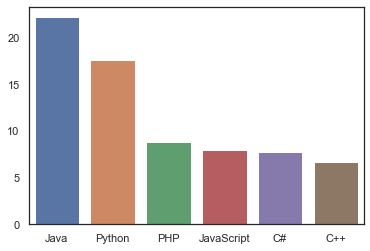

In [41]:
g = sns.barplot(data=dataT3.T)

##### 2.3.1 Используя те же самые данные и тип диграммы: Раскрасьте столбцы разными цветами, сделайте их горизонтальными.

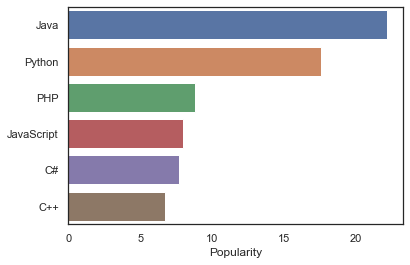

In [42]:
g = sns.barplot(x=dataT3.Popularity, y=dataT3.index)

#### 2.4. Напишите программу на Python, чтобы создать график столбиков стека и добавить меткук каждому разделу

In [43]:
dataT4

,R,G,W,P
G1,3.400221,11.248111,3.942534,4.244098
G2,7.706325,5.037782,4.747635,12.717466
G3,6.409790,6.658085,11.735292,11.377217
G4,10.516486,12.322207,4.646554,9.005143
G5,7.533004,7.459642,12.995218,10.470842
G6,7.112359,6.796853,4.638328,10.975676
G7,12.777929,7.245787,11.168500,3.982877
G8,3.447735,3.693718,8.568834,8.805521


In [44]:
type(fg)

matplotlib.figure.Figure

<AxesSubplot:>

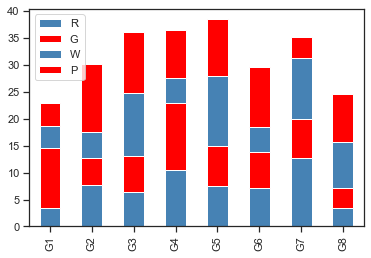

In [45]:
sns.set(style='ticks')
dataT4.plot(kind='bar', stacked=True, color=['steelblue', 'red'])

In [47]:
#g = sns.barplot(data=dataT4.T, staked=True)

#### 5. Напишите программу на Python, чтобы нарисовать scatter диаграмму рассеяния для сравнения двух предметных оценок по математике и естествознанию. Используйте оценки 10 учеников. 

<AxesSubplot:>

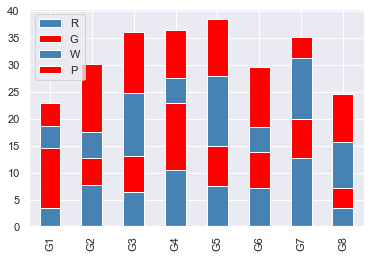

In [48]:
sns.set(style='darkgrid')
dataT4.plot(kind='bar', stacked=True, color=['steelblue', 'red'])

### 3. Задание Про

#### 3.1. На основе следующий данных, попробуйте построить диаграмму Timeline

In [49]:
names = ['Gingerbread', 'Ice Cream Sandwich', 'Jelly Bean', 'KitKat', 'Lollipop', 'Marshmallow', 'Nougat', 'Oreo', 'Pie', '10', '11'] 
dates = ['2011-02-9', '2011-10-19', '2012-11-13', '2013-10-31', '2014-11-3', '2015-10-5', '2016-08-22', '2017-08-21', '2018-08-06', '2019-09-3', '2020-02-19']
        
a = pd.DataFrame(names, index=dates, columns=['Names'])
a.index.name = 'Data'
a

,Names
Data,
2011-02-9,Gingerbread
2011-10-19,Ice Cream Sandwich
2012-11-13,Jelly Bean
2013-10-31,KitKat
2014-11-3,Lollipop
2015-10-5,Marshmallow
2016-08-22,Nougat
2017-08-21,Oreo
2018-08-06,Pie


<bound method _AxesBase.axis of <AxesSubplot:xlabel='Data', ylabel='Names'>>

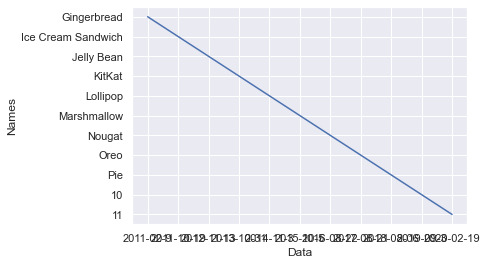

In [50]:
g = sns.lineplot(x='Data', y='Names', data=a)
g.axis

#### 3.2. Попробуйте повторить визуальный анализ данных
по аналогии с: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python 

Используя следующий набор данных: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv 

In [51]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [56]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
b=pd.read_csv(url, index_col='PassengerId')

In [57]:
b

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
